In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
import importlib
from cycler import cycler
from pathlib import Path
from matplotlib.ticker import MultipleLocator

# import utils
# importlib.reload(utils)

In [48]:
# Import Data
# file_paths = ['Data\task1-3_1v.txt', 'Data\task1-3_1v.txt', 'Data\task1-3_1v.txt']
file_paths = [r'Data\contact-potential_6V.txt', r'Data\contact-potential_7V.txt']

data_dict = {}
data_dict['6V'] = pd.read_csv(file_paths[0], sep=r'\s+', header=None, names=['x', 'y'])
data_dict['7V'] = pd.read_csv(file_paths[1], sep=r'\s+', header=None, names=['x', 'y'])

for key in data_dict:
    # Remove repeated x-values (keep the first occurrence)
    data_dict[key] = data_dict[key].drop_duplicates(subset='x', keep='first')

    # Sort by x to ensure monotonicity
    data_dict[key] = data_dict[key].sort_values(by='x').reset_index(drop=True)

min_len = min(len(data_dict['6V']) - 1, len(data_dict['7V']))    # Subtracted 1 from 6V to remove outlier data point
data_dict['6V'] = data_dict['6V'].iloc[:min_len].reset_index(drop=True)
data_dict['7V'] = data_dict['7V'].iloc[:min_len].reset_index(drop=True)

C:\Users\kearb\AppData\Local\Temp\ipykernel_39872\1157170508.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


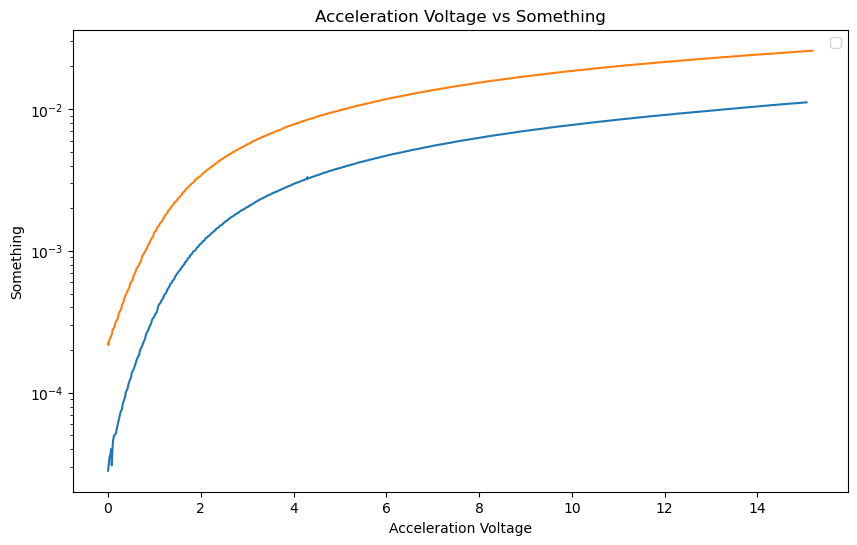

In [49]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.set(xlabel='Acceleration Voltage', ylabel='Something', title='Acceleration Voltage vs Something')
for key, data in data_dict.items():
    ax.plot(data['x'], data['y'])
ax.set_yscale('log')
ax.legend()
plt.show()
    